<p  style="text-align: center;"><font size="12">MALL CUSTOMER SEGMENTATION</font></p>
<p  style="text-align: center;"><font size="4">AN EXPLORATORY DATA ANALYSIS</font></p>

<img src="https://images.unsplash.com/photo-1519567241046-7f570eee3ce6?ixid=MXwxMjA3fDB8MHxzZWFyY2h8MXx8c2hvcHBpbmclMjBjZW50ZXJ8ZW58MHx8MHw%3D&ixlib=rb-1.2.1&w=1000&q=80" alt="mall">  

It is the number one goal of a mall to attract and retain customers. To meet that goal it is helpful to have insight into customers and their spending habits to aid in the development of marketing strategies.

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>

* <a href='#1'>I. LOAD LIBRARIES & PACKAGES</a>

* <a href='#2'>II. DATA OVERVIEW & INSIGHTS</a>

* <a href='#3'>III. FEATURE ENGINEERING</a>
    
* <a href='#4'>IV. EXPLORATORY DATA ANALYSIS</a>
    * <a href='#4a'>IVa. Univariate Exploration</a> 
    * <a href='#4b'>IVb. Bivariate Exploration</a> 
    

# <a id='1'>I. LOAD PACKAGES & LIBRARIES</a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install seaborn==0.11.0

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 283 kB 1.3 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# <a id='2'>II. DATA OVERVIEW & INSIGHTS</a>

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
col = ['cutomer_id', 'gender', 'age', 'annual_income', 'spending_score']
df.columns = col


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cutomer_id      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,cutomer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# <a id='3'>III. FEATURE ENGINEERING</a>

In [6]:
#Create new feature 'age_cat' to categorize values from 'age' colummn

df['age_cat'] = np.nan 

for col in [df]:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'young adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'middle age'
    col.loc[col['age'] > 55, 'age_cat'] = 'senior adult'

    
#Create new feature 'weight_status' to categorize values from 'bmi' colummn

df["income_class"] = np.nan

for col in [df]:
    col.loc[col["annual_income"] < 32, "income_class"] = "poor"
    col.loc[(col["annual_income"] >= 33) & (col["annual_income"] <= 54), "income_class"] = "lower middle"
    col.loc[(col["annual_income"] >= 55) & (col["annual_income"] < 106), "income_class"] = "middle"
    col.loc[col["annual_income"] >= 106, "income_class"] = "upper middle"
    
df.head()

,cutomer_id,gender,age,annual_income,spending_score,age_cat,income_class
0,1,Male,19,15,39,young adult,poor
1,2,Male,21,15,81,young adult,poor
2,3,Female,20,16,6,young adult,poor
3,4,Female,23,16,77,young adult,poor
4,5,Female,31,17,40,young adult,poor


Text(0.5, 1.0, 'FEATURE VARIABLE CORRELATIONS')

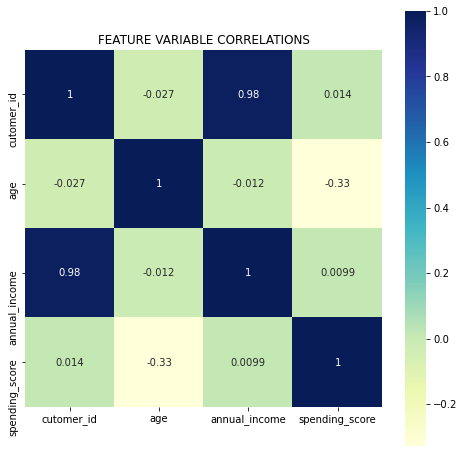

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cbar = True,  square = True, annot=True, cmap= 'YlGnBu')
plt.title('FEATURE VARIABLE CORRELATIONS')

# <a id='4'>IV. EXPLORATORY DATA ANALYSIS</a> 

We'll start by writing some plotting functions

In [8]:
def plot_dist(feature, binsize):
   
    hist_data = [df[feature]]
    group_labels = [feature]
    colors = ['#41d9b3']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = binsize, curve_type='kde')
    
    fig['layout'].update(title = feature.upper())

    py.iplot(fig, filename = 'Distribution_plot')

In [9]:
def plot_hist(feature):

    fig = px.histogram(df, x=feature)
    fig['layout'].update(title = feature.upper())
    fig.show()

## <a id='4a'>IVa. UNIVARIATE EXPLORATION</a>

Lets take a look at the distribution of our continuous variables

In [10]:
plot_dist('age', 0)

In [11]:
plot_dist('annual_income',0)

In [12]:
plot_dist('spending_score',0)

#### We'll use bar and pie plots to visualize categorical variables

### GENDER COUNT AND PERCENTAGES

In [33]:
df_gender = df.groupby(['gender'])[['gender']].count()
df_gender.rename(columns={'gender':'count'}, inplace=True)
df_gender = df_gender.reset_index()
df_gender

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Gender Count","Gender Percentages"))

bar_colors=['#c73062','#41d9b3']
pie_colors=['#c73062','#41d9b3']

fig.add_trace(go.Bar(x=df_gender['gender'], 
                     y=df_gender['count'],
                     text=df_gender['count'],
                     textposition = 'auto',
                     name='Gender Count',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=df_gender['gender'], 
                     values=df_gender['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Gender Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### AGE CATEGORY COUNT AND PERCENTAGES

In [32]:
df_age_cat = df.groupby(['age_cat'])[['age_cat']].count()
df_age_cat.rename(columns={'age_cat':'count'}, inplace=True)
df_age_cat = df_age_cat.reset_index()
df_age_cat.sort_values(by='count', ascending=False, inplace=True)

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Age Category Count","Age Category Percentages"))

bar_colors=['#8fd8ff','#40b1ed', '#0075b3']
pie_colors=['#8fd8ff','#40b1ed', '#0075b3']

fig.add_trace(go.Bar(x=df_age_cat['age_cat'], 
                     y=df_age_cat['count'],
                     text=df_age_cat['count'],
                     textposition = 'auto',
                     name='Age Cateogry Count',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=df_age_cat['age_cat'], 
                     values=df_age_cat['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Age Category Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### INCOME CLASS COUNT AND PERCENTAGES

In [31]:
df_income = df.groupby(['income_class'])[['income_class']].count()
df_income.rename(columns={'income_class':'count'}, inplace=True)
df_income = df_income.reset_index()
df_income.sort_values(by='count', ascending=False, inplace=True)

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Income Class Count","Income Class Percentages"))

bar_colors=['#29cf42', '#5fe373', '#9cf0a9', '#00ad1a']
pie_colors=['#29cf42', '#5fe373', '#9cf0a9', '#00ad1a']

fig.add_trace(go.Bar(x=df_income['income_class'], 
                     y=df_income['count'],
                     text=df_income['count'],
                     textposition = 'auto',
                     name='Income Class Count',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=df_income['income_class'], 
                     values=df_income['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Income Class Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

## <a id='4b'>IVb. BIVARIATE EXPLORATION</a>

### SPENDING SCORES BY GENDER

In [16]:
gender_spend_sum = df.groupby(['gender'])[['spending_score']].sum().reset_index()
gender_spend_avg = df.groupby(['gender'])[['spending_score']].mean().reset_index()

gender_age_spend = df.groupby(['gender','age_cat'])[['spending_score']].sum().reset_index()
gender_age_spend.sort_values(by='spending_score', ascending=False, inplace=True)

In [17]:
fig = px.histogram(df, 
                   x="spending_score", 
                   color="gender", 
                   marginal="box", 
                   hover_data=df.columns,
                   nbins = 50,
                   color_discrete_sequence=['#41d9b3','#c73062'])
fig.show()

In [30]:
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}], 
                           [{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Spending Score Sums", "Spending Score Sum Percentages",
                                    "Spending Score Averages", "Spending Score Avg Percentages"))


bar_colors=['#c73062','#41d9b3']
pie_colors=['#c73062','#41d9b3']

fig.add_trace(go.Bar(x=gender_spend_sum['gender'], 
                     y=gender_spend_sum['spending_score'],
                     text=gender_spend_sum['spending_score'],
                     textposition = 'auto',
                     name='Spending Score Sums',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Bar(x=gender_spend_avg['gender'], 
                     y=gender_spend_avg['spending_score'],
                     text=gender_spend_avg['spending_score'].round(2),
                     textposition = 'auto',
                     name='Spending Score Averages',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=2, col=1)

fig.add_trace(go.Pie(labels=gender_spend_sum['gender'], 
                     values=gender_spend_sum['spending_score'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Spending Score Sum Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.add_trace(go.Pie(labels=gender_spend_avg['gender'], 
                     values=gender_spend_avg['spending_score'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Spending Score Avg Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=2, col=2)

fig.update_layout(height=800, showlegend=True)

fig.show()

### SPENDING SCORE SUMS AND PERCENTAGES BY GENDER & AGE CATEGORY

In [29]:
f_age_spend = gender_age_spend.loc[gender_age_spend['gender'] == 'Female']
m_age_spend = gender_age_spend.loc[gender_age_spend['gender'] == 'Male']

fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}], 
                           [{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Female Spending Score Sums", "Female Spending Score Percentages",
                                    "Male Spending Score Sums", "Male Spending Score Percentages"))

f_bar_colors=['#ff4d94','#cc0245', '#912a53']
m_bar_colors=['#6ecaff','#0687d1', '#0e5680']
f_pie_colors=['#ff4d94','#cc0245', '#912a53']
m_pie_colors=['#6ecaff','#0687d1', '#0e5680']

fig.add_trace(go.Bar(x=f_age_spend['age_cat'], 
                     y=f_age_spend['spending_score'],
                     text=f_age_spend['spending_score'],
                     textposition = 'auto',
                     name='Female Spending Score Sums',
                     opacity = 0.8, 
                     marker=dict(color=f_bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Bar(x=m_age_spend['age_cat'], 
                     y=m_age_spend['spending_score'],
                     text=m_age_spend['spending_score'],
                     textposition = 'auto',
                     name='Male Spending Score Sums',
                     opacity = 0.8, 
                     marker=dict(color=m_bar_colors, line=dict(color='#000000',width=1))), row=2, col=1)

fig.add_trace(go.Pie(labels=f_age_spend['age_cat'], 
                     values=f_age_spend['spending_score'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Female Spending Score Percent",
                     marker  = dict(colors = f_pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.add_trace(go.Pie(labels=m_age_spend['age_cat'], 
                     values=m_age_spend['spending_score'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Male Spending Score Percent",
                     marker  = dict(colors = m_pie_colors, line = dict(width = 1.5))), 
              row=2, col=2)

fig.update_layout(height=800, showlegend=True)

fig.show()

### SPENDING SCORE VS AGE

In [20]:
fig = px.scatter(df, x="spending_score", y="age", color='gender')
fig.show()

In [21]:
spending_y = df[['spending_score']].loc[df['age_cat'] == 'young adult']
spending_m = df[['spending_score']].loc[df['age_cat'] == 'middle age']
spending_s = df[['spending_score']].loc[df['age_cat'] == 'senior adult']

young = spending_y['spending_score']
middle = spending_m['spending_score']
senior = spending_s['spending_score']
    
hist_data = [young, middle, senior]
    
group_labels = ['young adult', 'middle age', 'senior adult']
colors = ['#e8b920','#2aa8a8', '#e8204b']

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = 'SPENDING SCORE x AGE CATEGORY')

fig.show()

# py.iplot(fig, filename = 'Density plot')

### SPENDING SCORE VS ANNUAL INCOME

In [22]:
income_spend_sum = df.groupby(['income_class'])[['spending_score']].sum().reset_index()
income_spend_avg = df.groupby(['income_class'])[['spending_score']].mean().reset_index()
income_spend_avg

,income_class,spending_score
0,lower middle,50.333333
1,middle,50.339623
2,poor,49.656250
3,upper middle,49.625000


In [23]:
fig = px.scatter(df, x="spending_score", y="annual_income", color='age_cat')
fig.show()

### SPENDING SCORE SUMS & PERCENTAGES BY INCOME CLASS

In [35]:
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}], 
                           [{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Spending Score Sums", "Spending Score Sum Percentages",
                                    "Spending Score Averages", "Spending Score Avg Percentages"))

bar_colors=['#29cf42', '#5fe373', '#9cf0a9', '#00ad1a']
pie_colors=['#29cf42', '#5fe373', '#9cf0a9', '#00ad1a']

fig.add_trace(go.Bar(x=income_spend_sum['income_class'], 
                     y=income_spend_sum['spending_score'],
                     text=income_spend_sum['spending_score'],
                     textposition = 'auto',
                     name='Spending Score Sums',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Bar(x=income_spend_avg['income_class'], 
                     y=income_spend_avg['spending_score'],
                     text=income_spend_avg['spending_score'].round(2),
                     textposition = 'auto',
                     name='Spending Score Averages',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=2, col=1)


fig.add_trace(go.Pie(labels=income_spend_sum['income_class'], 
                     values=income_spend_sum['spending_score'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Income Class Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)


fig.add_trace(go.Pie(labels=income_spend_avg['income_class'], 
                     values=income_spend_avg['spending_score'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Income Class Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=2, col=2)

fig.update_layout(height=800, showlegend=True)

fig.show()

### INCOME X AGE

In [25]:
fig = px.scatter(df, x="age", y="annual_income", color='income_class')
fig.show()

In [27]:
age_income_avg = df.groupby(['age_cat'])[['annual_income']].mean().reset_index()

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Income Averages", "Income Percentages"))


bar_colors=['#4c98a1','#2aa8a8', '#006e6e']
pie_colors=['#4c98a1','#2aa8a8', '#006e6e']

fig.add_trace(go.Bar(x=age_income_avg['age_cat'], 
                     y=age_income_avg['annual_income'],
                     text=age_income_avg['annual_income'].round(2),
                     textposition = 'auto',
                     name='Income Averages',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=age_income_avg['age_cat'], 
                     values=age_income_avg['annual_income'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Income Percentages",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)



fig.update_layout(height=500, showlegend=True)

fig.show()